In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
plt.rcParams['axes.spines.top']=False
plt.rcParams['axes.spines.right']=False
import gpxpy
import gpxpy.gpx

In [3]:
# parse my testgpx file
with open('TESTGPX.gpx', 'r', encoding='utf-8') as gpx_file:
    gpx = gpxpy.parse(gpx_file)

In [4]:
gpx

GPX(tracks=[GPXTrack(name='Lunch Ride', segments=[GPXTrackSegment(points=[...])])])

In [5]:
# number of points in the file
gpx.get_track_points_no()

773

In [6]:
# elevations extremes
gpx.get_elevation_extremes()

MinimumMaximum(minimum=193.8, maximum=220.0)

In [7]:
# get uphill and downhill...cumulatively, should be about the same
gpx.get_uphill_downhill()
# nevermind, it wasn't a round trip

UphillDownhill(uphill=23.53000000000003, downhill=46.33000000000001)

In [10]:
# only 1 track in this file
gpx.tracks[0]

GPXTrack(name='Lunch Ride', segments=[GPXTrackSegment(points=[...])])

In [12]:
# also only 1 segment
gpx.tracks[0].segments[0]

GPXTrackSegment(points=[...])

In [16]:
# points?
gpx.tracks[0].segments[0].points[:10]

[GPXTrackPoint(29.465159, -98.518954, elevation=218.6, time=datetime.datetime(2017, 5, 16, 16, 37, 29, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.465002, -98.518949, elevation=218.8, time=datetime.datetime(2017, 5, 16, 16, 37, 31, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464959, -98.518924, elevation=218.8, time=datetime.datetime(2017, 5, 16, 16, 37, 32, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464957, -98.518895, elevation=218.8, time=datetime.datetime(2017, 5, 16, 16, 37, 34, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464941, -98.518772, elevation=218.9, time=datetime.datetime(2017, 5, 16, 16, 37, 35, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464944, -98.51886, elevation=219.0, time=datetime.datetime(2017, 5, 16, 16, 37, 36, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.46499, -98.519037, elevation=219.0, time=datetime.datetime(2017, 5, 16, 16, 37, 37, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(29.464892, -98.51902, elevation=219.0, time=datetime.datetime(2017, 5, 16, 16, 37, 38, tzinfo=Simp

In [17]:
# extracting points and storing as list of dictionaries
route_info = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'latitude': point.latitude,
                'longitude': point.longitude,
                'elevation': point.elevation
            })

In [18]:
route_info[:3]

[{'latitude': 29.465159, 'longitude': -98.518954, 'elevation': 218.6},
 {'latitude': 29.465002, 'longitude': -98.518949, 'elevation': 218.8},
 {'latitude': 29.464959, 'longitude': -98.518924, 'elevation': 218.8}]

In [20]:
# pandas DF ftw
route_df = pd.DataFrame(route_info)
route_df.head()

,latitude,longitude,elevation
0,29.465159,-98.518954,218.6
1,29.465002,-98.518949,218.8
2,29.464959,-98.518924,218.8
3,29.464957,-98.518895,218.8
4,29.464941,-98.518772,218.9


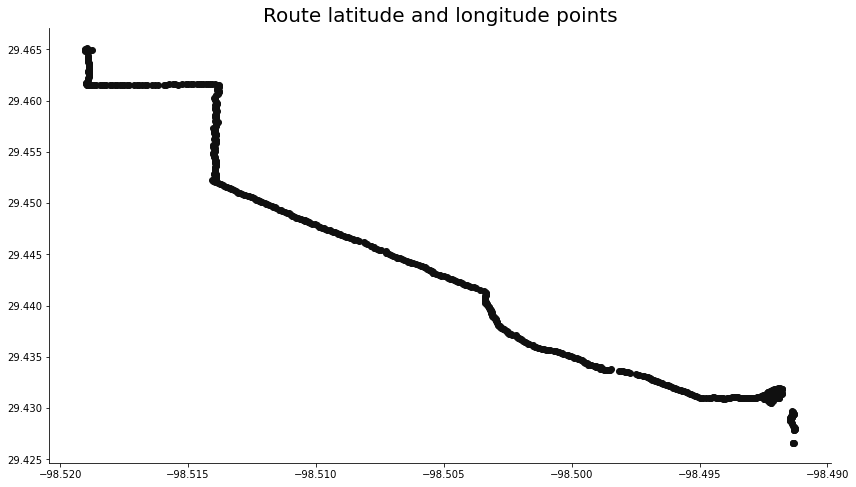

In [21]:
# mpl quick viz
plt.figure(figsize=(14, 8))
plt.scatter(route_df['longitude'], route_df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

### Looks like a ride from my house down Fredricksburg to...downtown

In [22]:
import folium

In [25]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)
display(route_map)

In [28]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

for _, row in route_df.iterrows():
    folium.CircleMarker(
        location= [row['latitude'], row['longitude']],
        radius=3
    ).add_to(route_map)
display(route_map)

## so, the minor problem here is that the data points are represented by circles.  apparently,  we will resolve by converting into ... list of tuples that folium can render as a polygonal linee

In [32]:
coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]

# coordinates

In [31]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='OpenStreetMap',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)


# for _, row in route_df.iterrows():
#     folium.CircleMarker(
#         location= [row['latitude'], row['longitude']],
#         radius=3
#     ).add_to(route_map)

display(route_map)

- Ah, I remember this ride, a day I paid a visit to the SW School of Art

In [33]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='CartoDBPositron',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)


# for _, row in route_df.iterrows():
#     folium.CircleMarker(
#         location= [row['latitude'], row['longitude']],
#         radius=3
#     ).add_to(route_map)

display(route_map)

In [34]:
route_map = folium.Map(
#     location=[45.79757947, 15.9007929]
    location = [29.424349, -98.491142],
    zoom_start=13,
    tiles='CartoDBDark_Matter',
    width=1024,
    height=600
)

coordinates = [tuple(x) for x in route_df[['latitude', 'longitude']].to_numpy()]
folium.PolyLine(coordinates, weight=6).add_to(route_map)


# for _, row in route_df.iterrows():
#     folium.CircleMarker(
#         location= [row['latitude'], row['longitude']],
#         radius=3
#     ).add_to(route_map)

display(route_map)

In [36]:
folium.Map?

- Haversine: calculates great circle difference between two points on a sphere given lat and long

In [38]:
import haversine as hs
plt.rcParams['figure.figsize']=(16,6)

In [39]:
route_df.head()

,latitude,longitude,elevation
0,29.465159,-98.518954,218.6
1,29.465002,-98.518949,218.8
2,29.464959,-98.518924,218.8
3,29.464957,-98.518895,218.8
4,29.464941,-98.518772,218.9


In [40]:
route_df['elevation_diff'] = route_df['elevation'].diff()

route_df.head()

,latitude,longitude,elevation,elevation_diff
0,29.465159,-98.518954,218.6,NaN
1,29.465002,-98.518949,218.8,0.2
2,29.464959,-98.518924,218.8,0.0
3,29.464957,-98.518895,218.8,0.0
4,29.464941,-98.518772,218.9,0.1


In [41]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1, lon1),
        point2=(lat2,lon2),
        unit=hs.Unit.METERS
    )
    return np.round(distance,  2)

In [43]:
haversine_distance(
    lat1=route_df.iloc[0]['latitude'],
    lon1=route_df.iloc[0]['longitude'],
    lat2=route_df.iloc[1]['latitude'],
    lon2=route_df.iloc[1]['longitude']
)

17.46

-  the distance from point 1 to point 2 is 17.46 meters

In [44]:
distances = [np.nan]
# since we can't calculate the distance for the first data point
for i in range(len(route_df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=route_df.iloc[i-1]['latitude'],
            lon1=route_df.iloc[i-1]['longitude'],
            lat2=route_df.iloc[i]['latitude'],
            lon2=route_df.iloc[i]['longitude']
        ))
        

In [45]:
route_df['distance'] = distances
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance
0,29.465159,-98.518954,218.6,NaN,NaN
1,29.465002,-98.518949,218.8,0.2,17.46
2,29.464959,-98.518924,218.8,0.0,5.36
3,29.464957,-98.518895,218.8,0.0,2.82
4,29.464941,-98.518772,218.9,0.1,12.04


## Calculate climbing:

In [48]:
route_df[route_df['elevation_diff'] > 0]['elevation_diff'].sum()

25.399999999999864

- almost entirely downhill, makes sense riding from home to the SWSA

In [49]:
route_df['distance'].sum()

6801.280000000001

- makes sense, 6.8km

## Viz elevation

In [51]:
route_df['cum_elevation'] = route_df['elevation_diff'].cumsum()
route_df['cum_distance'] = route_df['distance'].cumsum()

route_df.tail()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance
768,29.427847,-98.491304,194.6,0.1,3.32,-24.0,6654.80
769,29.426599,-98.491334,195.5,0.9,138.80,-23.1,6793.60
770,29.426631,-98.491359,195.7,0.2,4.30,-22.9,6797.90
771,29.426634,-98.491350,195.8,0.1,0.93,-22.8,6798.83
772,29.426627,-98.491326,195.8,0.0,2.45,-22.8,6801.28


## Missing values to 0

In [52]:
route_df = route_df.fillna(0)
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance
0,29.465159,-98.518954,218.6,0.0,0.00,0.0,0.00
1,29.465002,-98.518949,218.8,0.2,17.46,0.2,17.46
2,29.464959,-98.518924,218.8,0.0,5.36,0.2,22.82
3,29.464957,-98.518895,218.8,0.0,2.82,0.2,25.64
4,29.464941,-98.518772,218.9,0.1,12.04,0.3,37.68


Text(0, 0.5, 'Elevation, M')

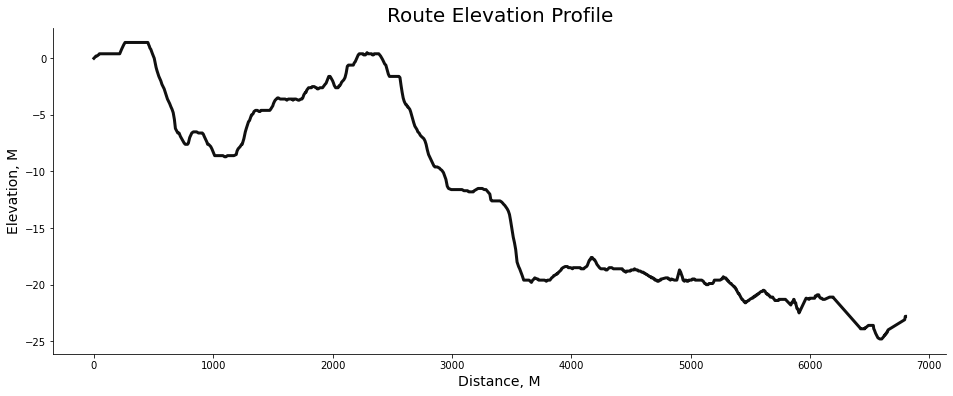

In [53]:
plt.plot(route_df['cum_distance'],route_df['cum_elevation'], color='#101010', lw=3)
plt.title('Route Elevation Profile', size = 20)
plt. xlabel('Distance, M',size=14)
plt.ylabel('Elevation, M', size =14)

# Gradient Calculation

In [54]:
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance
0,29.465159,-98.518954,218.6,0.0,0.00,0.0,0.00
1,29.465002,-98.518949,218.8,0.2,17.46,0.2,17.46
2,29.464959,-98.518924,218.8,0.0,5.36,0.2,22.82
3,29.464957,-98.518895,218.8,0.0,2.82,0.2,25.64
4,29.464941,-98.518772,218.9,0.1,12.04,0.3,37.68


In [57]:
# so, by logic, the avg gradient from point 1 to point 2 would be: (in %)
(.2 / 17.46) * 100

1.1454753722794961

In [58]:
gradients = [np.nan]

for ind, row in route_df.iterrows():
    if ind == 0:
        continue
    grade = (row['elevation_diff'] / row['distance']) * 100
    gradients.append(np.round(grade, 1))
    
gradients[:10]

[nan, 1.1, 0.0, 0.0, 0.8, 1.2, 0.0, 0.0, 0.0, 0.0]

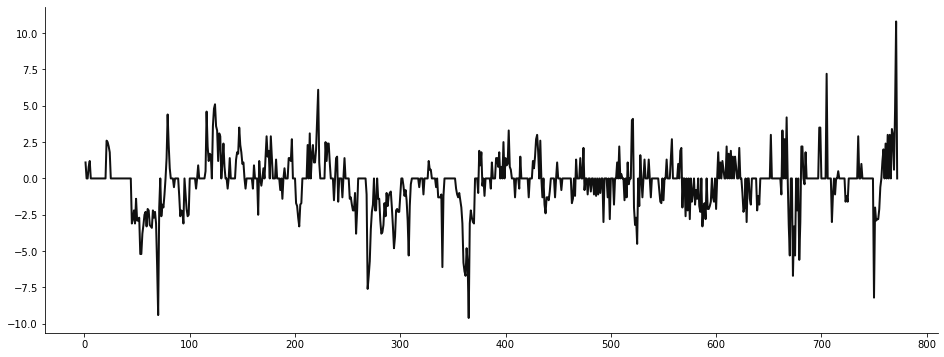

In [59]:
plt.plot(np.arange(len(gradients)), gradients, lw=2, color='#101010')

### To address large (probably erroneous) gradient changes:

In [62]:
gradients = [np.nan]

for ind, row in route_df.iterrows():
    if ind == 0:
        continue
        
    grade = (row['elevation_diff'] / row['distance']) * 100
    
    if grade > 30:
        gradients.append(np.nan)
    else:
        gradients.append(np.round(grade, 1))
    
gradients[:10]

[nan, 1.1, 0.0, 0.0, 0.8, 1.2, 0.0, 0.0, 0.0, 0.0]

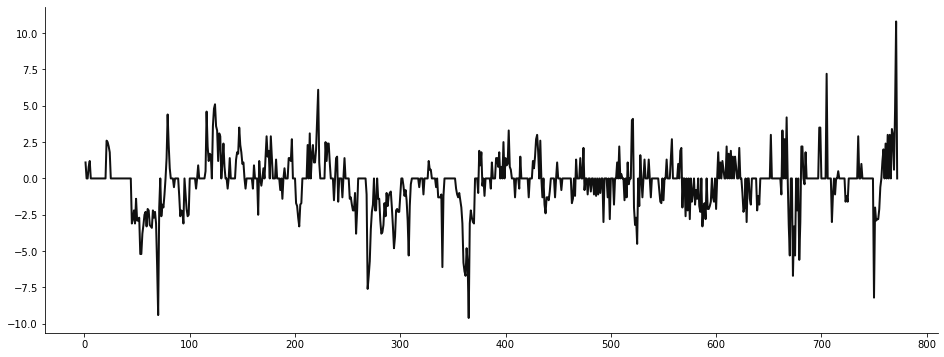

In [63]:
plt.plot(np.arange(len(gradients)), gradients, lw=2, color='#101010')

In [71]:
route_df['gradient'] = gradients
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance,gradient
0,29.465159,-98.518954,218.6,0.0,0.00,0.0,0.00,NaN
1,29.465002,-98.518949,218.8,0.2,17.46,0.2,17.46,1.1
2,29.464959,-98.518924,218.8,0.0,5.36,0.2,22.82,0.0
3,29.464957,-98.518895,218.8,0.0,2.82,0.2,25.64,0.0
4,29.464941,-98.518772,218.9,0.1,12.04,0.3,37.68,0.8


In [72]:
route_df[route_df['gradient'].isna()]

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance,gradient
0,29.465159,-98.518954,218.6,0.0,0.0,0.0,0.0,NaN


- the only nan is the first observation, bc there is no gradient...
- the following would interpolate any nans using adjacent values

In [73]:
#route_df[401:406].interpolate()

In [74]:
route_df['gradient'] = route_df['gradient'].interpolate().fillna(0)
route_df.head()

,latitude,longitude,elevation,elevation_diff,distance,cum_elevation,cum_distance,gradient
0,29.465159,-98.518954,218.6,0.0,0.00,0.0,0.00,0.0
1,29.465002,-98.518949,218.8,0.2,17.46,0.2,17.46,1.1
2,29.464959,-98.518924,218.8,0.0,5.36,0.2,22.82,0.0
3,29.464957,-98.518895,218.8,0.0,2.82,0.2,25.64,0.0
4,29.464941,-98.518772,218.9,0.1,12.04,0.3,37.68,0.8


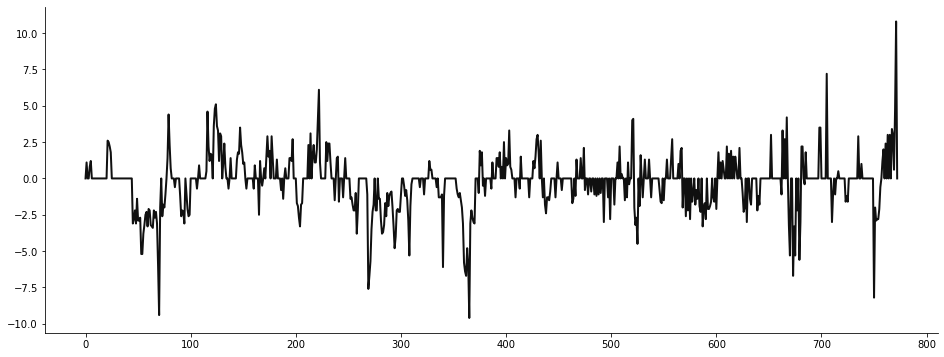

In [75]:
plt.plot(np.arange(len(route_df)), route_df['gradient'], lw=2, color='#101010')

- took care of that single nan at iloc 1